<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install palmerpenguins

In [2]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins

In [3]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


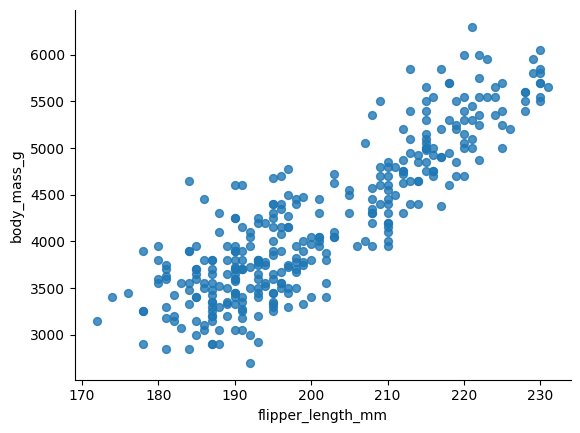

In [20]:
# @title flipper_length_mm vs body_mass_g

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

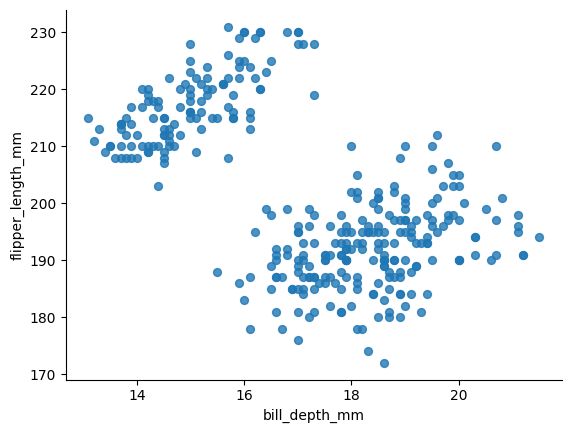

In [19]:
# @title bill_depth_mm vs flipper_length_mm

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

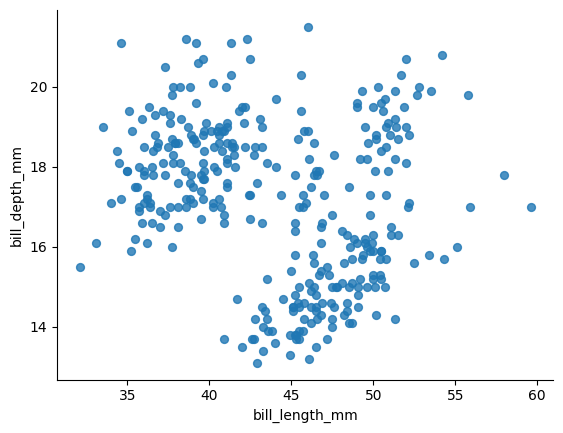

In [18]:
# @title bill_length_mm vs bill_depth_mm

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

In [ ]:
df['bill_depth_cut'] = pd.cut(df.bill_depth_mm,bins=3,right=True, labels=['shallow', 'medium', 'deep'])
pd.cut(df.bill_depth_mm,bins=3,right=True, labels=['shallow', 'medium', 'deep'])

In [ ]:
df['bill_depth_cut'].value_counts()

In [ ]:
df['bill_depth_qcut'] = pd.qcut(df.bill_depth_mm,q=3, labels=['shallow', 'medium', 'deep'])
pd.qcut(df.bill_depth_mm,q=3, labels=['shallow', 'medium', 'deep'])

In [ ]:
df['bill_depth_qcut'].value_counts()

transforma feature string em numero(acabei nao usando a feature island)

In [4]:
from sklearn.preprocessing import LabelEncoder

island = df.island
label_encoder = LabelEncoder()
encoded_island = label_encoder.fit_transform(island)

df['island'] = encoded_island


nan pra media

In [48]:
y = df.species
feature_names = ['bill_length_mm',
'bill_depth_mm',
'flipper_length_mm',
'body_mass_g']

df[feature_names] = df[feature_names].fillna(df[feature_names].mean())

X = df[feature_names]

nan deletados

In [11]:
df = df.dropna()

y = df.species
feature_names = ['bill_length_mm',
'bill_depth_mm',
'flipper_length_mm',
'body_mass_g']

X = df[feature_names]

In [12]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y ,test_size=0.3, random_state=64)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)

KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_X_scaled, train_y)

KNeighborsClassifier(n_neighbors=7)

In [15]:
from sklearn.metrics import accuracy_score

knn_pred_y = knn.predict(val_X_scaled)

knn_accuracy = accuracy_score(val_y, knn_pred_y)
print("knn Accuracy:", knn_accuracy)

knn Accuracy: 1.0


Naive bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(train_X_scaled, train_y)

GaussianNB()

In [17]:
nb_pred_y =naive.predict(val_X_scaled)

nb_accuracy = accuracy_score(val_y, nb_pred_y)
print("naive Accuracy:", nb_accuracy)

naive Accuracy: 0.99
